C:\Users\joaom\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


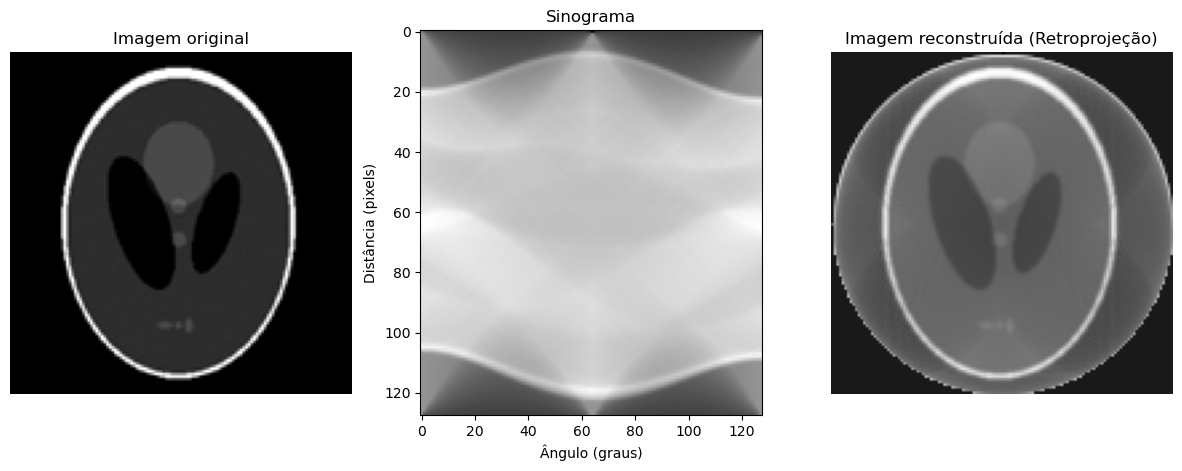

In [1]:
import numpy as np
from skimage.transform import radon, iradon
import matplotlib.pyplot as plt

#Carregar a imagem
image = plt.imread('fantoma.png')

#Converter a imagem para escala de cinza (se necessário)
if image.ndim == 3:
    image = np.mean(image, axis=2)

#Aplicar a transformada de Radon
theta = np.linspace(0, 180, max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

#Gerar a imagem reconstruída pelo método de retroprojeção
reconstructed_image = iradon(sinogram, theta=theta, circle=True)

#Exibir a imagem original, o sinograma e a imagem reconstruída
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.set_title('Imagem original')
ax1.imshow(image, cmap='gray')
ax1.axis('off')
ax2.set_title('Sinograma')
ax2.set_xlabel('Ângulo (graus)')
ax2.set_ylabel('Distância (pixels)')
ax2.imshow(sinogram, cmap='gray', aspect='auto')
ax3.set_title('Imagem reconstruída (Retroprojeção)')
ax3.imshow(reconstructed_image, cmap='gray')
ax3.axis('off')
plt.show()